# Techniques de régression (Régression Logistique)

## Question 1 : Type initial du problème Iris

Le dataset Iris est à la base un problème de **classification multiclasse** : il contient 3 espèces de fleurs (Setosa, Versicolor, Virginica) avec 4 features chacune, pour 150 échantillons au total. Donc ni régression, ni binaire à l'origine.

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

## Question 2 : Objectif des lignes 8 à 13

`X = iris.data[:, :2]` — on sélectionne uniquement les **2 premières colonnes** (longueur et largeur des sépales), ce qui permet de travailler en 2D et de visualiser facilement avec un scatter plot.

La boucle `for` **transforme le problème multiclasse en binaire** : la classe Setosa (0) reste 0, et les deux autres (Versicolor=1, Virginica=2) sont fusionnées en 1. C'est nécessaire car la régression logistique de base est un classifieur **binaire**.

In [26]:
iris = datasets.load_iris()
X = iris.data[:,:2]
y = []

In [27]:
for e in iris.target:
    if e == 0:
        y.append(0)
    else:
        y.append(1)

Text(0, 0.5, 'y')

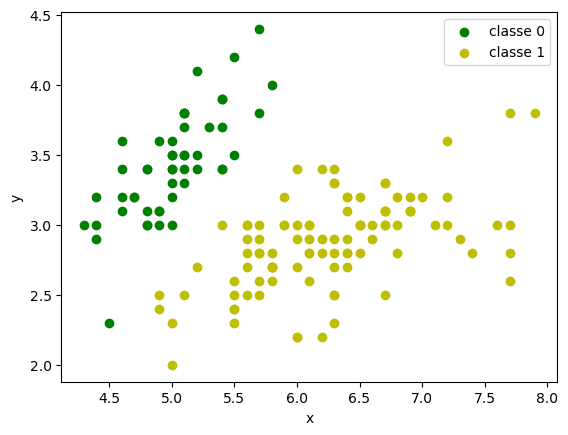

In [28]:
y = np.array(y)
plt.scatter(X[y==0][:,0],X[y==0][:,1],color='g')
plt.scatter(X[y==1][:,0],X[y==1][:,1],color='y')
plt.legend(labels=("classe 0", "classe 1"))
plt.xlabel("x")
plt.ylabel("y")
# plt.show()

## Question 3 : Rôle de `train_test_split` et ses paramètres

`train_test_split` divise les données en **jeu d'entraînement** et **jeu de test**, pour éviter d'évaluer le modèle sur des données qu'il a déjà vues.

- **`test_size=0.2`** : 20% des données vont au test, 80% à l'entraînement.
- **`random_state=0`** : fixe la graine aléatoire pour que la division soit toujours identique à chaque exécution (reproductibilité).

In [29]:
model = LogisticRegression(C=1e20)
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)
model.fit(x_train,y_train)
score1 = model.score(x_test,y_test)
score2 = model.score(x_train,y_train)
print("score sur le test set : ", score1)
print("score sur le train set : ", score2)

score sur le test set :  1.0
score sur le train set :  1.0


## Question 4 : Différence entre `score1` et `score2`

- **`score1`** : score sur le **jeu de test** (données jamais vues pendant l'entraînement). C'est le meilleur indicateur de la capacité de généralisation du modèle.
- **`score2`** : score sur le **jeu d'entraînement**. Il est souvent plus élevé ou égal à `score1`.

Ici les deux valent **1.0 (100%)**, ce qui indique que le modèle sépare parfaitement les deux classes — lié au problème binaire simplifié avec `C=1e20`.

## Question 5 : Variation de `test_size`

| `test_size` | Score Test | Score Train |
|-------------|------------|-------------|
| 0.2         | 1.0        | 1.0         |
| 0.3         | ~0.978     | 1.0         |
| 0.4         | ~0.967     | 1.0         |
| 0.5         | ~0.960     | 1.0         |

Plus `test_size` augmente, moins le modèle dispose de données pour s'entraîner, ce qui peut légèrement faire baisser le score de test.

In [30]:
theta0 = model.intercept_
theta1 = model.coef_[0][0]
theta2 = model.coef_[0][1]
iris_to_predict = [[5.5,2.5], [7,3], [3,2], [5,3]]
print(model.predict(iris_to_predict))

[1 1 0 0]


## Question 6 : Rôle de `cross_val_score` et paramètre `cv`

`cross_val_score` implémente la **validation croisée (k-fold)** : au lieu d'une seule division train/test, elle découpe les données en `cv` parties et évalue le modèle `cv` fois.

Avec **`cv=5`** : `[1.0, 1.0, 0.958, 1.0, 1.0]` → moyenne = **0.9917**

- `cv=3` → plus rapide mais moins fiable
- `cv=10` → plus précis mais plus coûteux

In [31]:
score=cross_val_score(model, x_train, y_train, cv=5, scoring='accuracy')
print("cross validation scores : ", score)
print(score.mean())

cross validation scores :  [1.         1.         0.95833333 1.         1.        ]
0.9916666666666668


In [32]:
def fct_reg_logistic(x1,x2):
    z = theta0 + theta1*x1 + theta2*x2
    return z

print([fct_reg_logistic(e[0], e[1]) for e in iris_to_predict])

[array([61.70357577]), array([144.63079789]), array([-108.07585411]), array([-29.07361765])]
